<a href="https://colab.research.google.com/github/malakamgad24/Markov-Model/blob/main/Copy_of_Markov_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 1: Importing the data set**

In [ ]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("mkechinov/ecommerce-events-history-in-electronics-store")

df = pd.read_csv(path + '/events.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


# **Data Pre-Processing**

**Count rows with any NaN values in the DataFrame**

In [ ]:
nan_rows_count = df.isna().any(axis=1).sum()
print("Number of rows with NaN values:", nan_rows_count)

Number of rows with NaN values: 368873


**Know how many rows are in the dataset**

In [ ]:
total_rows = df.shape[0]
print("Total number of rows in the dataset:", total_rows)

Total number of rows in the dataset: 885129


**Delete all rows that has NaN in it**

In [ ]:
df = df.dropna()
print("Number of rows after dropping NaN values:", df.shape[0])

Number of rows after dropping NaN values: 516256


**Knowing the datatypes of each column for analysis and exploration**

In [ ]:
print("Column Names and Data Types:")
print(df.dtypes)

Column Names and Data Types:
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object


# **Section 2: Showing the analysis of the chosen attributes**

# **event_time Analysis**

**convert event_time to a DateTime format for easier manipulation.**

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

ploting distribution of events by hour of the day to know which day and time has the most events

Events by Day of the Week:
 day_of_week
Monday       77373
Tuesday      76189
Wednesday    74028
Thursday     73688
Friday       73192
Sunday       72584
Saturday     69202
Name: count, dtype: int64


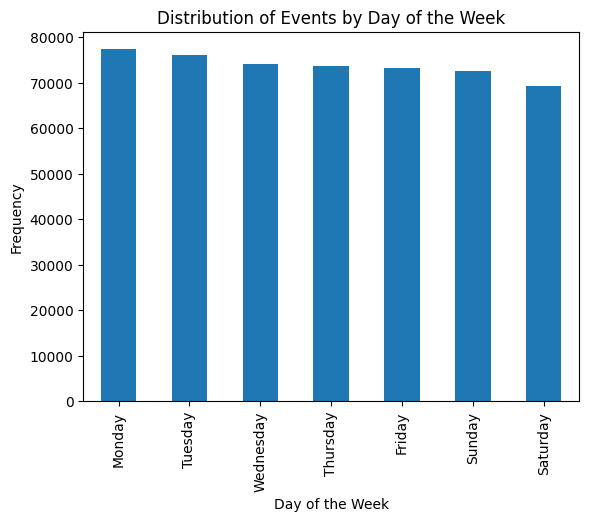

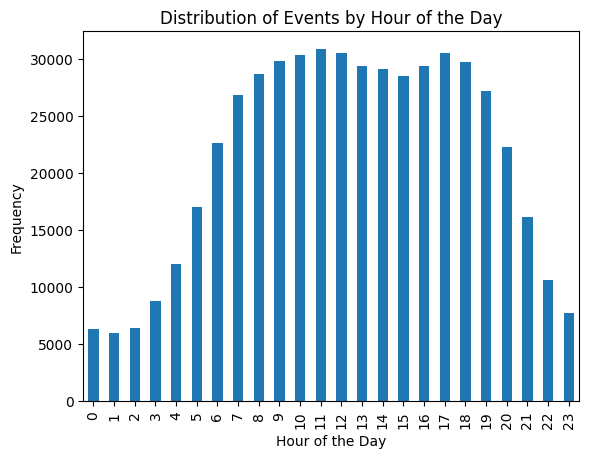

In [ ]:
import matplotlib.pyplot as plt

df['day_of_week'] = df['event_time'].dt.day_name()
df['hour_of_day'] = df['event_time'].dt.hour

# Analyze event distribution by day of the week
day_counts = df['day_of_week'].value_counts()
print("Events by Day of the Week:\n", day_counts)

# Plot distribution of events by day of the week
day_counts.plot(kind='bar')
plt.title('Distribution of Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

# Analyze event distribution by hour of the day
hour_counts = df['hour_of_day'].value_counts().sort_index()

# Plot distribution of events by hour of the day
hour_counts.plot(kind='bar')
plt.title('Distribution of Events by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()



Time Range of Events: 157 days 12:01:43


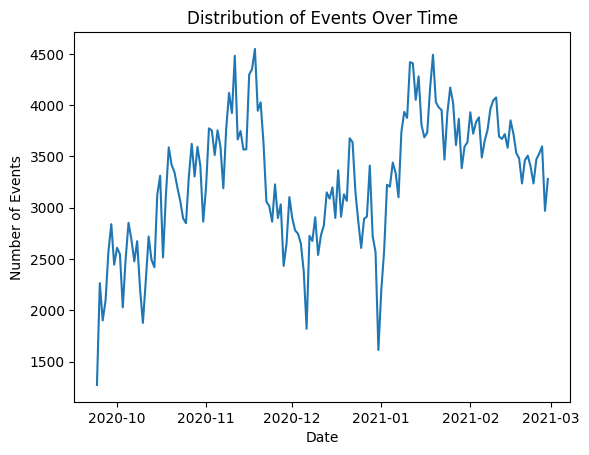

In [ ]:
time_range = df['event_time'].max() - df['event_time'].min()
print("\nTime Range of Events:", time_range)

# Plot the distribution of events over time
df['event_date'] = df['event_time'].dt.date
event_time_counts = df['event_date'].value_counts().sort_index()
event_time_counts.plot(title='Distribution of Events Over Time', xlabel='Date', ylabel='Number of Events')
plt.show()

# **Event_type Analysis**

**Understanding how often each type of event occurs gives insight into user behavior stages.**

event_type
view        458481
cart         34669
purchase     23106
Name: count, dtype: int64


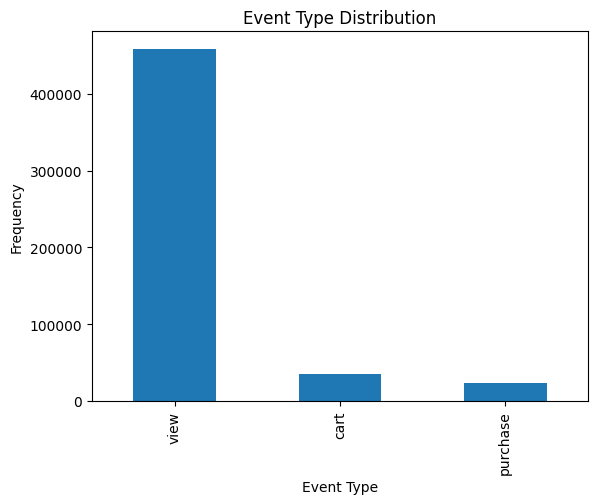

In [ ]:
event_type_counts = df['event_type'].value_counts()
event_type_counts.plot(kind='bar', title='Event Type Distribution', xlabel='Event Type', ylabel='Frequency')
print(event_type_counts)
plt.show()

**Analyzing how users transition from one event_type to another helps establish it as a primary feature for the Markov Model.**

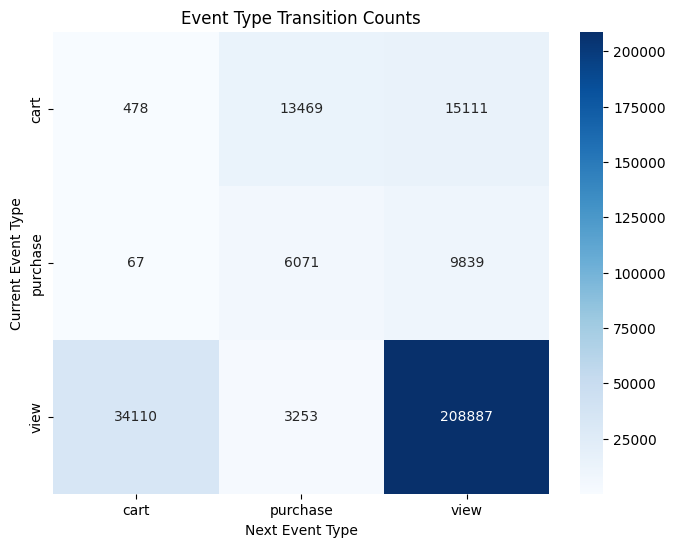

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.sort_values(by=['user_id', 'event_time'])
df['next_event_type'] = df.groupby('user_id')['event_type'].shift(-1)
transition_counts = df.groupby(['event_type', 'next_event_type']).size().unstack().fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(transition_counts, annot=True, cmap="Blues", fmt=".0f")
plt.title("Event Type Transition Counts")
plt.xlabel("Next Event Type")
plt.ylabel("Current Event Type")
plt.show()

# **Product_Id Analysis**

Analyzing the frequency of each product_id

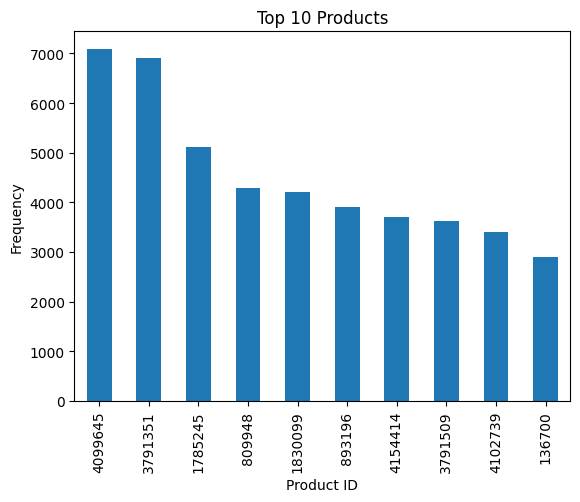

In [ ]:
product_counts = df['product_id'].value_counts().head(10)
product_counts.plot(kind='bar', title='Top 10 Products', xlabel='Product ID', ylabel='Frequency')
plt.show()

# **Category-Id Anaysis**

**Calculating the frequency of each category_id**

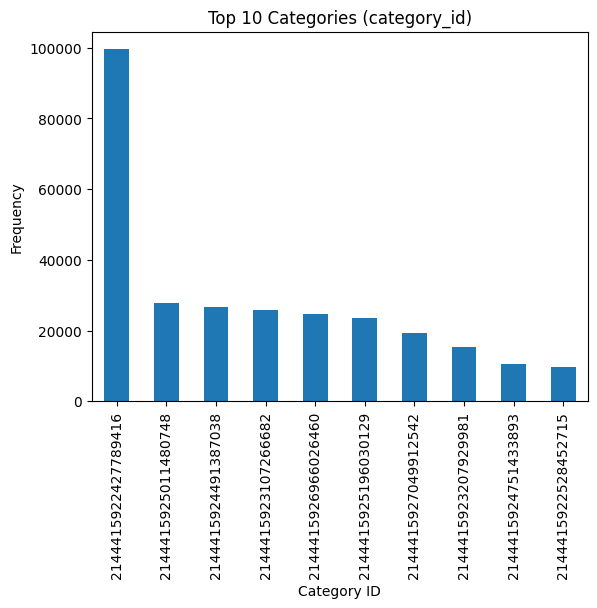

In [ ]:
category_counts = df['category_id'].value_counts().head(10)
category_counts.plot(kind='bar', title='Top 10 Categories (category_id)', xlabel='Category ID', ylabel='Frequency')
plt.show()

# **category_code Analysis**

**Identifying the most popular categories**

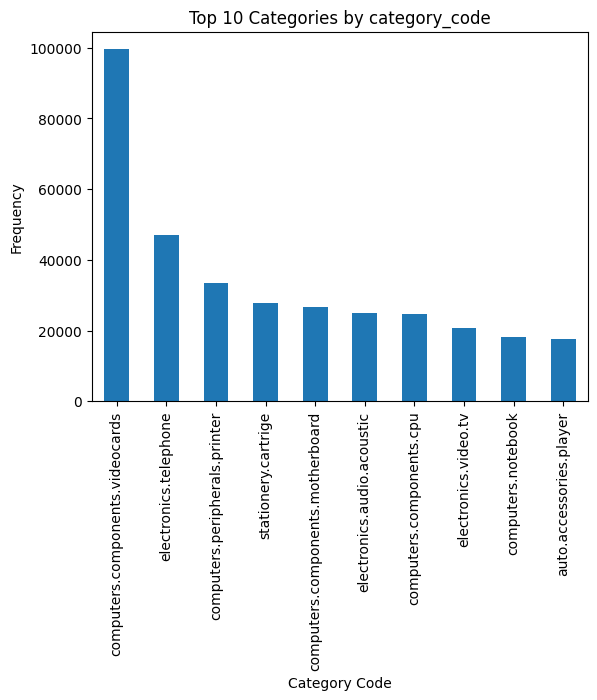

In [ ]:
top_categories = df['category_code'].value_counts().head(10)
top_categories.plot(kind='bar', title='Top 10 Categories by category_code', xlabel='Category Code', ylabel='Frequency')
plt.show()

**Analyze transitions for each category**

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


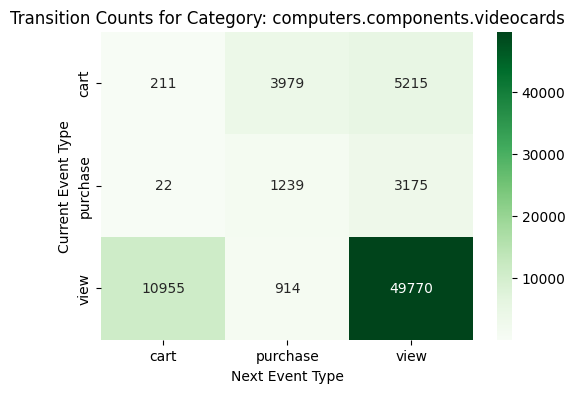

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


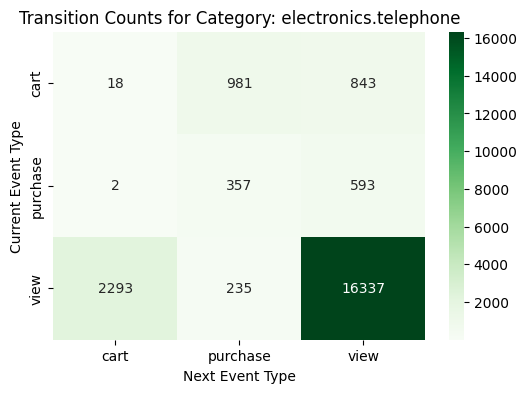

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


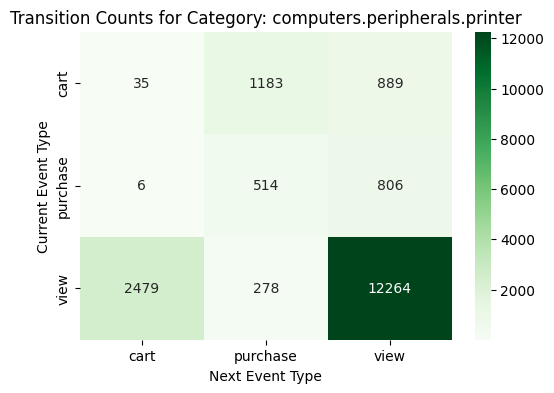

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


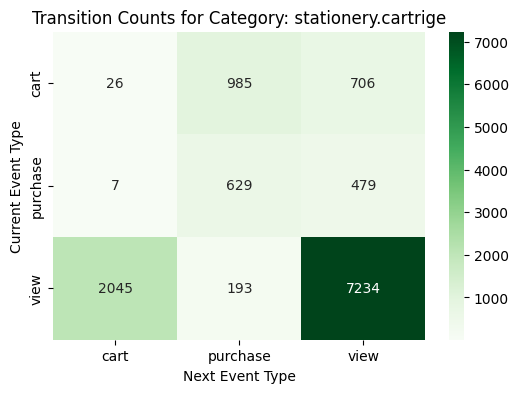

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


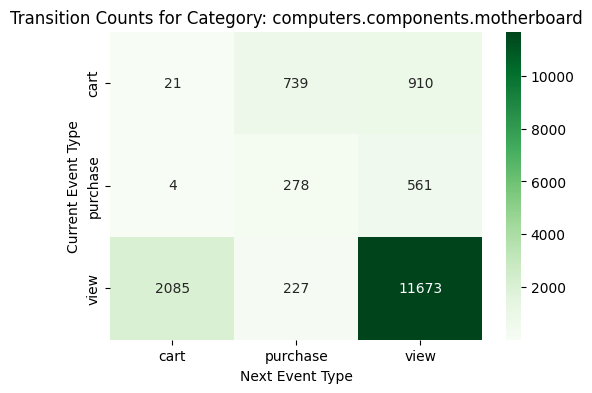

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


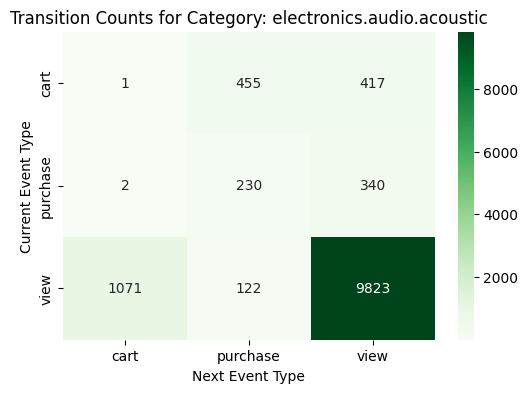

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


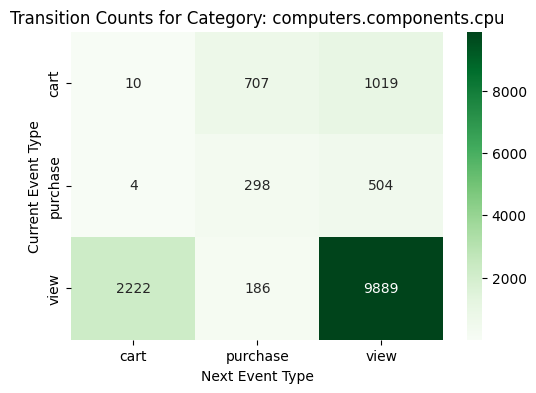

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


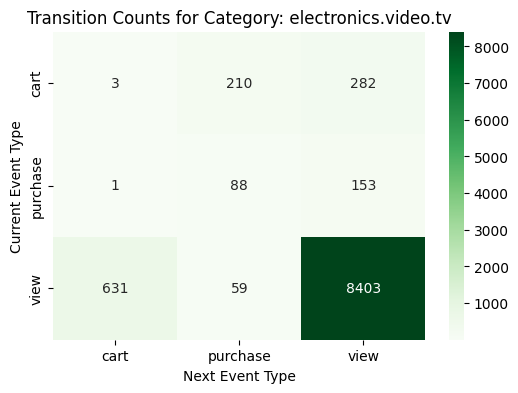

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


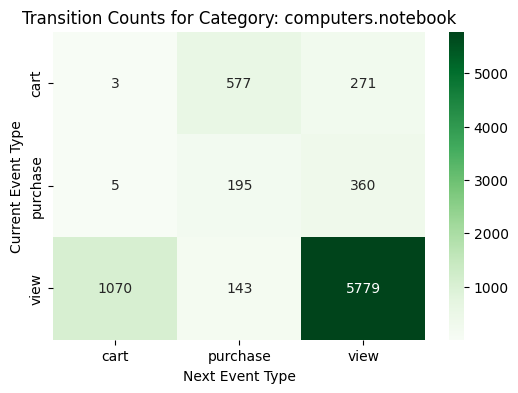

<ipython-input-42-d09c369759a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)


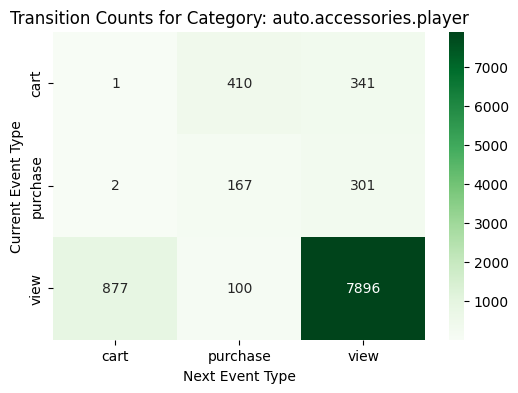

In [ ]:
for category in top_categories.index:
    category_data = df[df['category_code'] == category]
    category_data['next_event_type'] = category_data.groupby('user_id')['event_type'].shift(-1)
    category_transition_counts = category_data.groupby(['event_type', 'next_event_type']).size().unstack().fillna(0)

    plt.figure(figsize=(6, 4))
    sns.heatmap(category_transition_counts, annot=True, cmap="Greens", fmt=".0f")
    plt.title(f"Transition Counts for Category: {category}")
    plt.xlabel("Next Event Type")
    plt.ylabel("Current Event Type")
    plt.show()

# **brand analysis**

**Analyze the top brands**

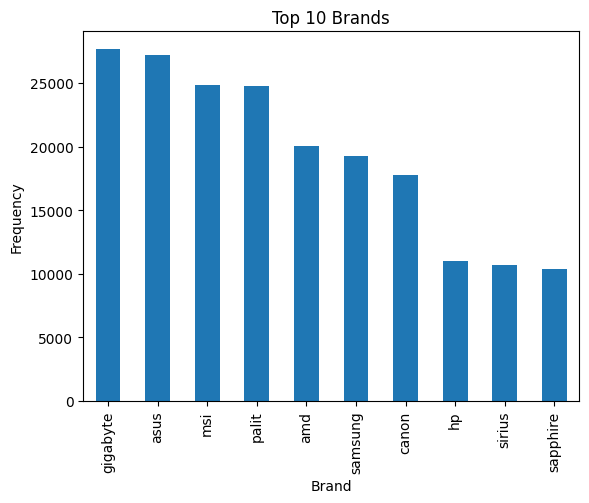

In [ ]:
top_brands = df['brand'].value_counts().head(10)
top_brands.plot(kind='bar', title='Top 10 Brands', xlabel='Brand', ylabel='Frequency')
plt.show()

**Brand and Event Type Relationship**

In [ ]:
from scipy.stats import chi2_contingency
brand_event_table = pd.crosstab(df['brand'], df['event_type'])
chi2, p, _, _ = chi2_contingency(brand_event_table)
print(f"Chi-square Statistic: {chi2:.2f}, p-value: {p:.2e}")

if p < 0.05:
    print("Significant relationship between brand and event type.")
else:
    print("No significant relationship between brand and event type.")

Chi-square Statistic: 16354.68, p-value: 0.00e+00
Significant relationship between brand and event type.


# **Price Analysis**

**Analyze the distribution of prices**

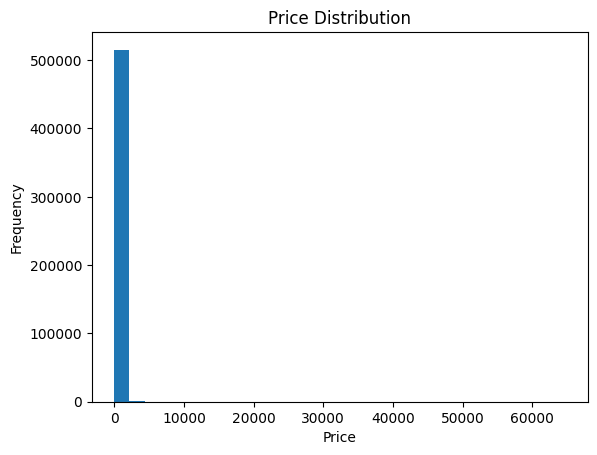

In [ ]:
df['price'].plot(kind='hist', bins=30, title='Price Distribution', xlabel='Price', ylabel='Frequency')
plt.show()

**Average Price by Category**

In [ ]:
price_by_event = df['price'].mean()
print(price_by_event)

188.90817332873615


# **User_session analysis**

In [ ]:
events_per_session = df['user_session'].value_counts()
print("Average Number of Events per Session:", events_per_session.mean())

Average Number of Events per Session: 1.8881358783707176


## **Section 3: The output analysis which is in this case the Event_type**

**grouping data by user_id and sort it by event_time to analyze the sequence of event_type transitions for each user**

In [ ]:
df = df.sort_values(by=['user_id', 'event_time'])

df['next_event_type'] = df.groupby('user_id')['event_type'].shift(-1)

**examine the ordering of events.**

In [ ]:
# Sort by event_time
df = df.sort_values(by='event_time')

# Look at pairs of consecutive event types to understand common patterns
df['next_event_type'] = df['event_type'].shift(-1)
sequential_counts = df.groupby(['event_type', 'next_event_type']).size().unstack().fillna(0)

# Show the most common sequential patterns
print("Sequential Patterns of Event Types:\n", sequential_counts)

Sequential Patterns of Event Types:
 next_event_type   cart  purchase    view
event_type                              
cart              1791      3151   29727
purchase           985      2873   19248
view             31893     17082  409505


**Calculate the entropy of the attribute**

In [ ]:
import numpy as np

# Calculate the frequency of each unique event_type
event_type_counts = df['event_type'].value_counts()

# Calculate the probability of each event_type
event_type_probs = event_type_counts / event_type_counts.sum()

# Calculate entropy for event_type
entropy_event_type = -np.sum(event_type_probs * np.log2(event_type_probs))
print(f"Entropy of event_type: {entropy_event_type:.4f}")

Entropy of event_type: 0.6143


# **Section 4: The construction of the Markov Model (DTMC)**

**Why Discrete-Time Markov Chain (DTMC) Fits:**

1.Finite and Countable States: users can move between a finite
number of discrete states (view, cart, purchase).
2.Discrete Events: Events (e.g., a user viewing or purchasing a product) are timestamped but occur at specific instances.
3.Memoryless Property: DTMC assumes that the probability of moving to the next state depends only on the current state and not on the sequence of states that preceded it. This aligns with my model’s purpose—to predict the likelihood of transitioning from one event type (e.g., view) to another (cart or purchase).

**Transition Matrix**

In [ ]:
# Sort data by user_id and event_time
df = df.sort_values(by=['user_id', 'event_time'])

# Shift the event_type column to get the next event type for each customer
df['next_event_type'] = df.groupby('user_id')['event_type'].shift(-1)

# Calculate transition counts between event types
transition_counts = df.groupby(['event_type', 'next_event_type']).size().unstack().fillna(0)
print("Transition Counts Between Event Types:")
print(transition_counts)

# Normalize to create transition probability matrix
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)
print("\nTransition Probability Matrix:")
print(transition_matrix)

Transition Counts Between Event Types:
next_event_type   cart  purchase    view
event_type                              
cart               478     13475   15100
purchase            67      6071    9840
view             34113      3247  208894

Transition Probability Matrix:
next_event_type      cart  purchase      view
event_type                                   
cart             0.016453  0.463808  0.519740
purchase         0.004193  0.379960  0.615847
view             0.138528  0.013186  0.848287


**Visualize the Transition Probability Matrix**

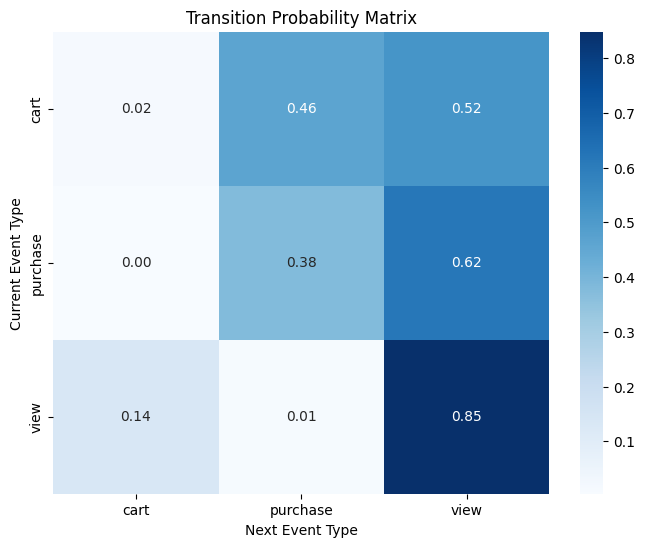

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Transition Probability Matrix")
plt.xlabel("Next Event Type")
plt.ylabel("Current Event Type")
plt.show()

# **Section 5: Representing Calculated Properties and Probabilities**

**Most Common Transitions**

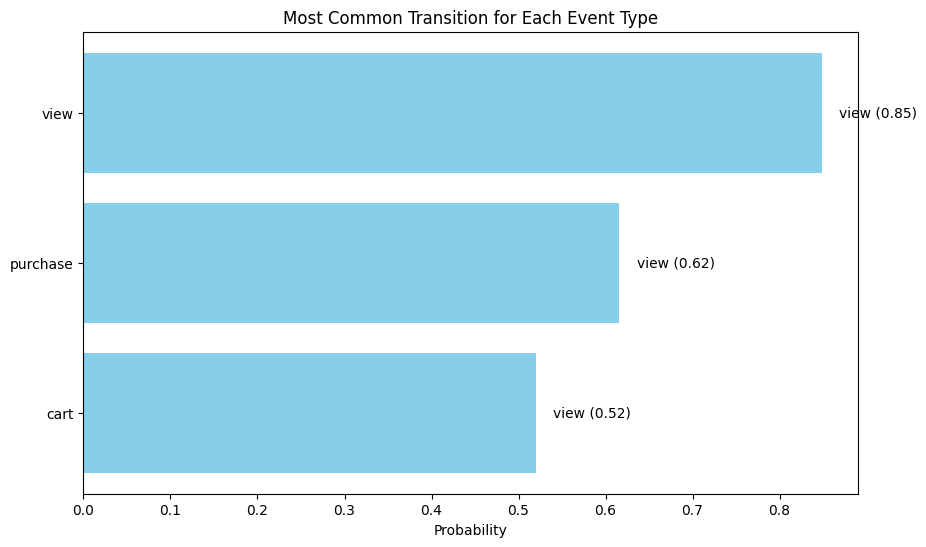

In [ ]:
import matplotlib.pyplot as plt

# Most Common Transitions Data
most_common_transitions = transition_matrix.idxmax(axis=1)
most_common_transition_probs = transition_matrix.max(axis=1)

# Plot the most common transitions
plt.figure(figsize=(10, 6))
plt.barh(most_common_transitions.index, most_common_transition_probs, color='skyblue')
for index, (label, prob) in enumerate(zip(most_common_transitions.values, most_common_transition_probs)):
    plt.text(prob + 0.02, index, f"{label} ({prob:.2f})", va='center')
plt.xlabel("Probability")
plt.title("Most Common Transition for Each Event Type")
plt.show()

**Self-Transition Probabilities Visualization**

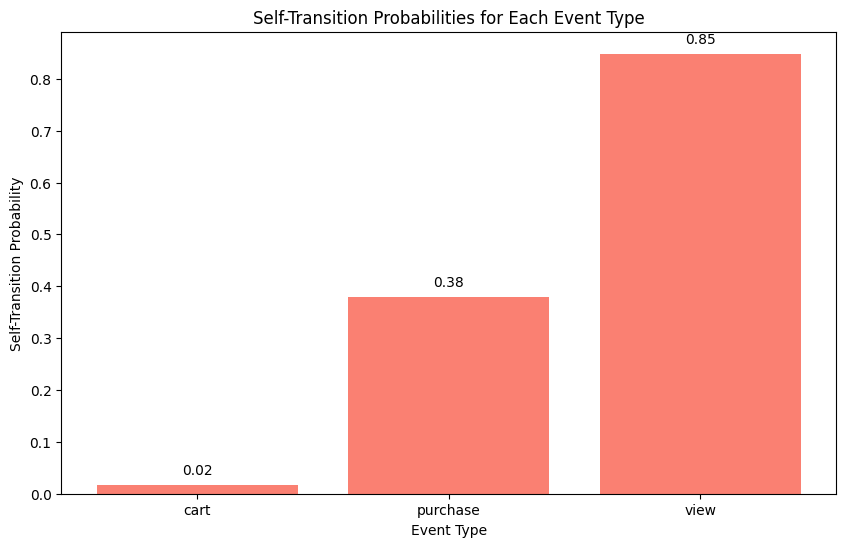

In [ ]:
# Self-Transition Probabilities Data
self_transitions = transition_matrix.values.diagonal()
self_transition_df = pd.DataFrame({
    'Event Type': transition_matrix.index,
    'Self-Transition Probability': self_transitions
})

# Plot self-transition probabilities
plt.figure(figsize=(10, 6))
plt.bar(self_transition_df['Event Type'], self_transition_df['Self-Transition Probability'], color='salmon')
for i, prob in enumerate(self_transition_df['Self-Transition Probability']):
    plt.text(i, prob + 0.02, f"{prob:.2f}", ha='center')
plt.xlabel("Event Type")
plt.ylabel("Self-Transition Probability")
plt.title("Self-Transition Probabilities for Each Event Type")
plt.show()

**Overall Conversion Path Probability**

In [ ]:
# Define transition probabilities towards the purchase state from various starting points
# Assuming you have these transition states, e.g., view -> add_to_cart -> purchase

# Transition probabilities (these should be extracted from the transition matrix for each relevant path)
view_to_cart_prob = transition_matrix.loc['view', 'cart'] if 'cart' in transition_matrix.columns else 0
cart_to_purchase_prob = transition_matrix.loc['cart', 'purchase'] if 'purchase' in transition_matrix.columns else 0
view_to_purchase_prob = transition_matrix.loc['view', 'purchase'] if 'purchase' in transition_matrix.columns else 0

# Calculate the full conversion probability for users going through the most common path
full_conversion_path_prob = view_to_cart_prob * cart_to_purchase_prob

# Summing up direct and multi-step paths leading to a purchase as a form of full conversion rate approximation
# This considers both direct (view -> purchase) and multi-step (view -> add_to_cart -> purchase) paths
full_conversion_rate_approx = full_conversion_path_prob + view_to_purchase_prob
print(f"Probability of transitioning from 'view' to 'add_to_cart': {view_to_cart_prob:.2f}")
print(f"Probability of transitioning from 'add_to_cart' to 'purchase': {cart_to_purchase_prob:.2f}")
print(f"Probability of transitioning from 'view' directly to 'purchase': {view_to_purchase_prob:.2f}")

print(f"Probability of full conversion path (view -> add_to_cart -> purchase): {full_conversion_path_prob:.2f}")
print(f"Probability of full conversion rate including direct path (view -> purchase): {full_conversion_rate_approx:.2f}")

Probability of transitioning from 'view' to 'add_to_cart': 0.14
Probability of transitioning from 'add_to_cart' to 'purchase': 0.46
Probability of transitioning from 'view' directly to 'purchase': 0.01
Probability of full conversion path (view -> add_to_cart -> purchase): 0.06
Probability of full conversion rate including direct path (view -> purchase): 0.08


# **Measuring Model Accuracy**

In [ ]:
import pandas as pd
import numpy as np

# Sort data by user_id and event_time
df = df.sort_values(by=['user_id', 'event_time']).reset_index(drop=True)

# the split index (80% of the data for training)
split_index = int(0.8 * len(df))

# Split into training and testing sets
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Calculate the transition probabilities on the training set
train_df['next_event_type'] = train_df.groupby('user_id')['event_type'].shift(-1)
train_transition_counts = train_df.groupby(['event_type', 'next_event_type']).size().unstack().fillna(0)
train_transition_matrix = train_transition_counts.div(train_transition_counts.sum(axis=1), axis=0)

# Evaluate the model accuracy on the test set
test_df['next_event_type'] = test_df.groupby('user_id')['event_type'].shift(-1)

# Drop rows with NaN in the next_event_type column in test set
test_df = test_df.dropna(subset=['next_event_type'])

# Predict the next event type based on the most likely transition in the training matrix
correct_predictions = 0
total_predictions = 0

for _, row in test_df.iterrows():
    current_event = row['event_type']
    actual_next_event = row['next_event_type']

    if current_event in train_transition_matrix.index:
        # Get the most likely next event type based on the transition matrix
        predicted_next_event = train_transition_matrix.loc[current_event].idxmax()

        # Check if the prediction matches the actual next event
        if predicted_next_event == actual_next_event:
            correct_predictions += 1
        total_predictions += 1

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
print(f"Model Accuracy: {accuracy:.2f}%")

<ipython-input-56-f0eace1e6486>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['next_event_type'] = train_df.groupby('user_id')['event_type'].shift(-1)
<ipython-input-56-f0eace1e6486>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['next_event_type'] = test_df.groupby('user_id')['event_type'].shift(-1)


Model Accuracy: 78.18%
